In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import KMeans, FuzzyCMeans, SilhouetteAnalysis

### **Preprocessing the Data**

The given data is loaded from the `.npy` format and checked by plotting on a graph. If there is some issue with plotting, we may assume that the data is not loaded correctly, or not available in the right format.

(3000, 2)


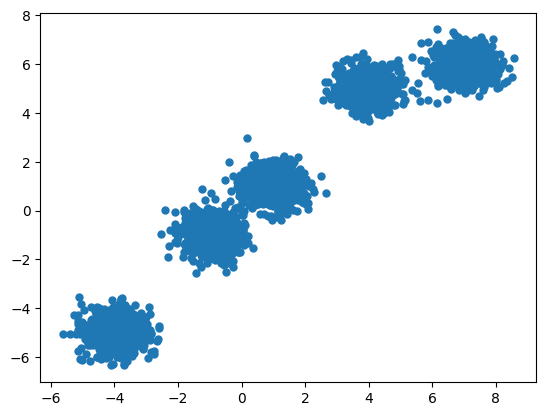

In [2]:
# Load the data

path: str = r"Datasets\Question-2\kmeans_data.npy"
data: np.ndarray = np.load(path)
print(data.shape)

# Plot the data
plt.scatter(data[:, 0], data[:, 1], linewidths=0.01)
plt.show()

### **Perform $k$-Means Clustering**

Using the `KMeans` implemented in `utils.py`, the data is clustered into varying number of clusters. 
After several runs, it was observed that the best Silhouette Scores were obtained for $k = 5$ clusters as given by the `SilhouetteAnalysis` implemented in `utils.py`.

In [3]:
k: int = 5

# Perform K-Means Clustering
kmeans = KMeans(k)
kmeans.fit(data)
centroids, labels = kmeans.train()

# Run Silhouette Analysis
sa = SilhouetteAnalysis()
sa.fit(kmeans)
sa.run_analysis()

Sample: 3000 Silhouette Score: 0.769039062843062346
AVERAGE SILHOUETTE SCORE: 0.7281004407160417
Average Silhouette Score for Cluster 1: 0.6783333085845709
Average Silhouette Score for Cluster 2: 0.720577094575756
Average Silhouette Score for Cluster 3: 0.6952540626333559
Average Silhouette Score for Cluster 4: 0.7260852793320269
Average Silhouette Score for Cluster 5: 0.820289840019173


### **Visualize the Clusters**

The clusters are plotted, making sure to color each cluster differently. 
The centroids of the clusters are marked with red-crosses on the graph.

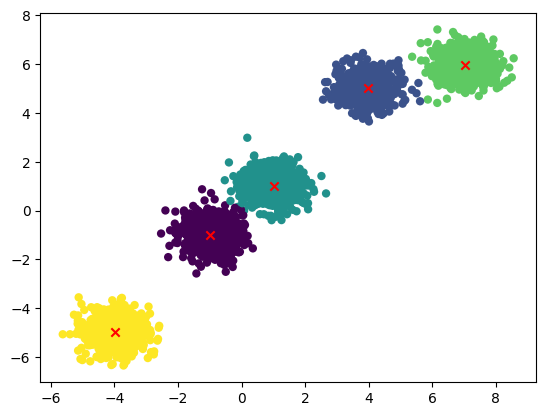

In [4]:
# Plot the Clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, linewidths=0.01)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="red")
plt.show()

### **Perform Fuzzy $C$-Means Clustering**

Having found out the best $k$ for the data, we now perform Fuzzy $C$-Means Clustering with $c = k$ clusters.
The data is clustered into $c = 5$ clusters using the `FuzzyCMeans` implemented in `utils.py`.

The objective function $J(U, V)$ is noted at the end of the clustering. 

To objectively analyse the clustering and compare both the algorithms, we assume hard clustering. Using the membership matrix, each data point is assigned the cluster with the highest membership value. Then, the Silhouette Score is calculated for the hard clustering.

In [5]:
# Perform Fuzzy C-Means Clustering with c = k
fuzzycmeans = FuzzyCMeans(k, m=2, tol=0.3)
fuzzycmeans.fit(data)
centroids, labels = fuzzycmeans.train()
print("min{J(U, V)} =", fuzzycmeans.objective())

# Assume Hard Clustering and Run Silhouette Analysis
sa = SilhouetteAnalysis()
sa.fit(fuzzycmeans)
sa.run_analysis()

min{J(U, V)} = 1303.8852532542478
Sample: 3000 Silhouette Score: 0.7702915162548376368
AVERAGE SILHOUETTE SCORE: 0.7281050732746231
Average Silhouette Score for Cluster 1: 0.6746573680158059
Average Silhouette Score for Cluster 2: 0.8205481092116684
Average Silhouette Score for Cluster 3: 0.698926446334573
Average Silhouette Score for Cluster 4: 0.7246739125539565
Average Silhouette Score for Cluster 5: 0.7218813241125701


### **Visualize the Clusters**

The newly obtained clusters are plotted, making sure to color each cluster differently. 
The centroids of the clusters are marked with red-crosses on the graph.

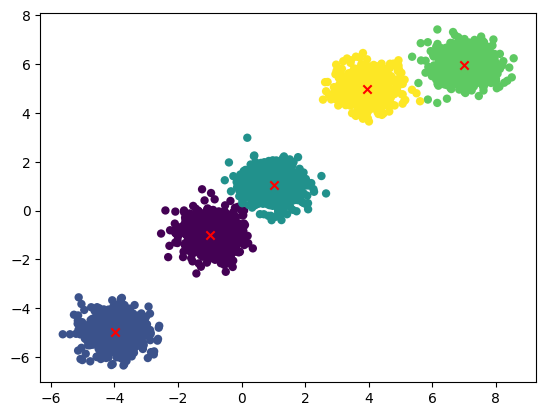

In [6]:
# Plot the Clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, linewidths=0.01)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="red")
plt.show()